In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
#####PART1

    Year   Total
0   2001  108506
1   2002  110417
2   2003  110851
3   2004  113697
4   2005  113914
5   2006  118112
6   2007  122637
7   2008  125017
8   2009  127151
9   2010  134599
10  2011  135585
11  2012  135445


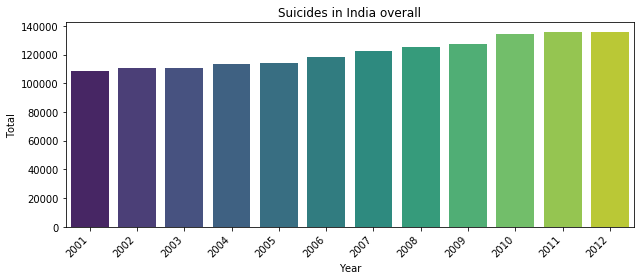

In [15]:
indiaOverall = df[(df['Type_code']=='Education_Status') & (df['State']=='Total (All India)')]
overall = indiaOverall.groupby(['Year'],as_index=False).sum()
print(overall)
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

In [ ]:
#ML Part-Linear Regression

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

X = np.array(overall["Year"]).reshape(-1, 1) 
Y = np.array(overall["Total"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.9401011789277768


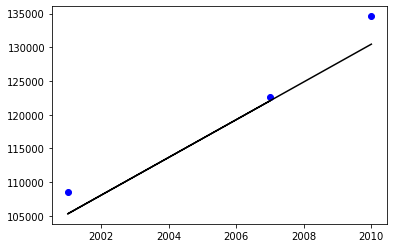

In [24]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

In [25]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2646.9577777776867
9297781.353493797
3049.2263532728753


In [26]:
for i in range(2013,2026):
    
    y_pred = regr.predict([[i]]) 
    #plt.scatter(X_test, y_test, color ='b') 
    #plt.plot(X_test, y_pred, color ='k') 
    #print(y_pred)
    temp={'Year':i,'Total':y_pred[0][0]}
    overall=overall.append(temp,ignore_index=True)
    #overall["Total"].append([[y_pred]])

In [30]:
#overall

      Year          Total
0   2001.0  108506.000000
1   2002.0  110417.000000
2   2003.0  110851.000000
3   2004.0  113697.000000
4   2005.0  113914.000000
5   2006.0  118112.000000
6   2007.0  122637.000000
7   2008.0  125017.000000
8   2009.0  127151.000000
9   2010.0  134599.000000
10  2011.0  135585.000000
11  2012.0  135445.000000
12  2013.0  138850.265556
13  2014.0  141647.868889
14  2015.0  144445.472222
15  2016.0  147243.075556
16  2017.0  150040.678889
17  2018.0  152838.282222
18  2019.0  155635.885556
19  2020.0  158433.488889
20  2021.0  161231.092222
21  2022.0  164028.695556
22  2023.0  166826.298889
23  2024.0  169623.902222
24  2025.0  172421.505556


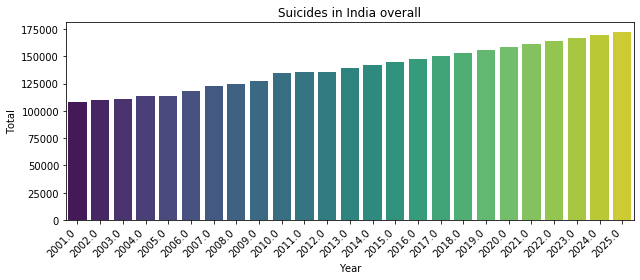

In [29]:
print(overall)
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

In [77]:
#Sample Input
sample_year=1997

#regr is the trained machine learning model
y_pred = regr.predict([[sample_year]]) 
print(int(y_pred[0][0]))

94058


In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
#X = np.array(overall["Year"]).reshape(-1, 1) 
#Y = np.array(overall["Total"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test)
print(X_train) 
regr = LogisticRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

[[ 1.35172997]
 [ 1.05500876]
 [-0.72531852]
 [ 0.75828754]
 [-1.02203973]
 [ 0.46156633]
 [-1.91220337]
 [ 0.16484512]
 [-0.13187609]]
0.0


C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
X = np.array(overall["Year"]).reshape(-1, 1) 
Y = np.array(overall["Total"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20) 
regr = RandomForestRegressor(n_estimators = 100, random_state = 0)  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 


0.9929170602802717


In [58]:
for i in range(2013,2030):
    
    y_pred = regr.predict([[i]]) 
    #plt.scatter(X_test, y_test, color ='b') 
    #plt.plot(X_test, y_pred, color ='k') 
    #print(y_pred)
    temp={'Year':i,'Total':y_pred[0]}
    overall=overall.append(temp,ignore_index=True)
    #overall["Total"].append([[y_pred]])

In [64]:
y_pred = regr.predict([[2000]]) 
#plt.scatter(X_test, y_test, color ='b') 
#plt.plot(X_test, y_pred, color ='k') 
print(y_pred)
#temp={'Year':i,'Total':y_pred[0]}
#overall=overall.append(temp,ignore_index=True)
#overall["Total"].append([[y_pred]])

[109466.96]


      Year          Total
0   2001.0  108506.000000
1   2002.0  110417.000000
2   2003.0  110851.000000
3   2004.0  113697.000000
4   2005.0  113914.000000
5   2006.0  118112.000000
6   2007.0  122637.000000
7   2008.0  125017.000000
8   2009.0  127151.000000
9   2010.0  134599.000000
10  2011.0  135585.000000
11  2012.0  135445.000000
12  2013.0  138850.265556
13  2014.0  141647.868889
14  2015.0  144445.472222
15  2016.0  147243.075556
16  2017.0  150040.678889
17  2018.0  152838.282222
18  2019.0  155635.885556
19  2020.0  158433.488889
20  2021.0  161231.092222
21  2022.0  164028.695556
22  2023.0  166826.298889
23  2024.0  169623.902222
24  2025.0  172421.505556
25  2027.0  171162.584056
26  2028.0  171162.584056
27  2029.0  171162.584056
28  2013.0  137424.884056
29  2014.0  140032.990967
..     ...            ...
33  2018.0  152586.497922
34  2019.0  154768.628522
35  2020.0  158125.752522
36  2021.0  160895.379822
37  2022.0  163497.150922
38  2023.0  166266.778222
39  2024.0  

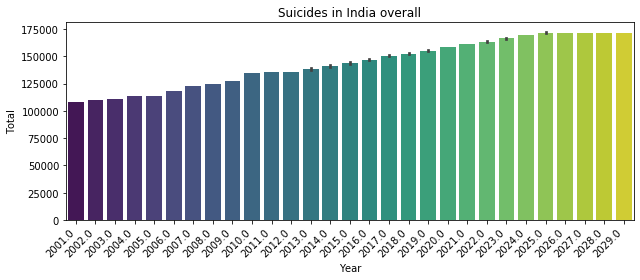

In [60]:
print(overall)
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

In [ ]:
#####PART 2

In [16]:
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

In [ ]:
#####PART1

KeyError: 'Type_code'

In [ ]:
# indiaOverall = df[(df['Type_code']=='Education_Status') & (df['State']=='Total (All India)')]
# overall = indiaOverall.groupby(['Year'],as_index=False).sum()
# print(overall)
# plt.figure(figsize=(9,4))
# plt.xticks(rotation=45,ha='right')
# sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
# plt.tight_layout()

In [ ]:
#####PART 2

In [7]:
#replacing df
df = pd.DataFrame(df.groupby(["Year","Type"])["Total"].sum()).reset_index()
df

,Year,Type,Total
0,2001,Bankruptcy or Sudden change in Economic,2918
1,2001,By Consuming Insecticides,21530
2,2001,By Consuming Other Poison,20062
3,2001,By Drowning,8253
4,2001,By Fire-Arms,395
5,2001,By Fire/Self Immolation,10822
6,2001,By Hanging,29757
7,2001,By Jumping from (Building),620
8,2001,By Jumping from (Other sites),728
9,2001,By Jumping off Moving Vehicles/Trains,671


In [17]:
causes_list=df['Type'].unique()
causes_list

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [21]:
#df1=filter_type_code.loc[filter_type_code['Type']=='Paralysis']

In [20]:
# #Creating a list to get max 10 values
# l=[]
# for i in causes_list:
#     t=filter_type_code.loc[filter_type_code['Type']==i]
#     #print(t['Type'],"----",max(t['Total']))
#     #print("esdrftg")
#     #print(t)
#     #print(i)
#     #print(max(t['Total']))
#     l.append([max(t['Total']),i])


In [11]:
l.sort()
l[-10:]

[]

In [18]:
df1=causesDf.loc[causesDf['Type']=='Family Problems']
df2=causesDf.loc[causesDf['Type']=='Causes Not known']
df3=causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)']
df4=causesDf.loc[causesDf['Type']=='Other Prolonged Illness']
df5=causesDf.loc[causesDf['Type']=='Insanity/Mental Illness']
dfnames=[df1,df2,df3,df4,df5]


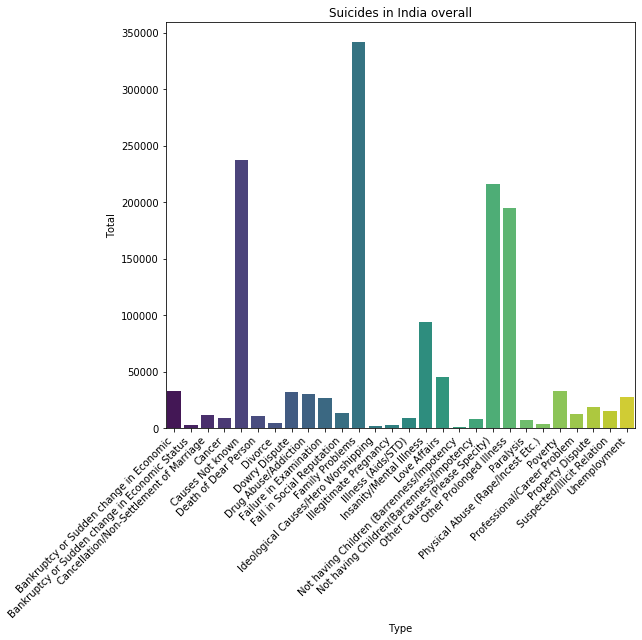

In [19]:
filter_type_code = pd.DataFrame(causesDf.groupby(["Type"])["Total"].sum()).reset_index()
plt.figure(figsize=(9,9))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Type',y='Total',data=filter_type_code,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

In [26]:
#Linear Regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

Final=[]
for DF in dfnames:
    X = np.array(DF["Year"]).reshape(-1, 1) 
    Y = np.array(DF["Total"]).reshape(-1, 1)
    #print(DF['Type'][-1:1])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
    regr = LinearRegression() 

    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))
    
    for i in range(2013,2026):
        y_pred = regr.predict([[i]]) 
        #plt.scatter(X_test, y_test, color ='b') 
        #plt.plot(X_test, y_pred, color ='k') 
        #print(y_pred)
        temp={'Year':i,'Total':y_pred[0][0]}
        DF=DF.append(temp,ignore_index=True)
    Final.append(DF)
    print(DF)
df1     
        #overall["Total"].append([[y_pred]])

0.004057190890093709
[[91.70855373]]
[[93.26935136]]
[[94.830149]]
[[96.39094663]]
[[97.95174426]]
[[99.51254189]]
[[101.07333953]]
[[102.63413716]]
[[104.19493479]]
[[105.75573242]]
[[107.31653006]]
[[108.87732769]]
[[110.43812532]]
              State    Year Type_code             Type  Gender Age_group  \
0     A & N Islands  2001.0    Causes  Family Problems  Female      0-14   
1     A & N Islands  2001.0    Causes  Family Problems    Male      0-14   
2     A & N Islands  2001.0    Causes  Family Problems  Female     15-29   
3     A & N Islands  2001.0    Causes  Family Problems    Male     15-29   
4     A & N Islands  2001.0    Causes  Family Problems  Female     30-44   
5     A & N Islands  2001.0    Causes  Family Problems    Male     30-44   
6     A & N Islands  2001.0    Causes  Family Problems  Female     45-59   
7     A & N Islands  2001.0    Causes  Family Problems    Male     45-59   
8     A & N Islands  2001.0    Causes  Family Problems  Female       60+   
9     

[[83.36428232]]
[[85.19636603]]
              State    Year Type_code                           Type  Gender  \
0     A & N Islands  2001.0    Causes  Other Causes (Please Specity)  Female   
1     A & N Islands  2001.0    Causes  Other Causes (Please Specity)    Male   
2     A & N Islands  2001.0    Causes  Other Causes (Please Specity)  Female   
3     A & N Islands  2001.0    Causes  Other Causes (Please Specity)    Male   
4     A & N Islands  2001.0    Causes  Other Causes (Please Specity)  Female   
5     A & N Islands  2001.0    Causes  Other Causes (Please Specity)    Male   
6     A & N Islands  2001.0    Causes  Other Causes (Please Specity)  Female   
7     A & N Islands  2001.0    Causes  Other Causes (Please Specity)    Male   
8     A & N Islands  2001.0    Causes  Other Causes (Please Specity)  Female   
9     A & N Islands  2001.0    Causes  Other Causes (Please Specity)    Male   
10    A & N Islands  2002.0    Causes  Other Causes (Please Specity)  Female   
11    A 

,State,Year,Type_code,Type,Gender,Age_group,Total
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
29,A & N Islands,2001,Causes,Family Problems,Male,0-14,0
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5
88,A & N Islands,2001,Causes,Family Problems,Male,15-29,3
112,A & N Islands,2001,Causes,Family Problems,Female,30-44,0
152,A & N Islands,2001,Causes,Family Problems,Male,30-44,4
159,A & N Islands,2001,Causes,Family Problems,Female,45-59,2
193,A & N Islands,2001,Causes,Family Problems,Male,45-59,3
232,A & N Islands,2001,Causes,Family Problems,Female,60+,0
253,A & N Islands,2001,Causes,Family Problems,Male,60+,1


In [23]:
Final[0]

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001.0,Causes,Family Problems,Female,0-14,0.000000
1,A & N Islands,2001.0,Causes,Family Problems,Male,0-14,0.000000
2,A & N Islands,2001.0,Causes,Family Problems,Female,15-29,5.000000
3,A & N Islands,2001.0,Causes,Family Problems,Male,15-29,3.000000
4,A & N Islands,2001.0,Causes,Family Problems,Female,30-44,0.000000
5,A & N Islands,2001.0,Causes,Family Problems,Male,30-44,4.000000
6,A & N Islands,2001.0,Causes,Family Problems,Female,45-59,2.000000
7,A & N Islands,2001.0,Causes,Family Problems,Male,45-59,3.000000
8,A & N Islands,2001.0,Causes,Family Problems,Female,60+,0.000000
9,A & N Islands,2001.0,Causes,Family Problems,Male,60+,1.000000


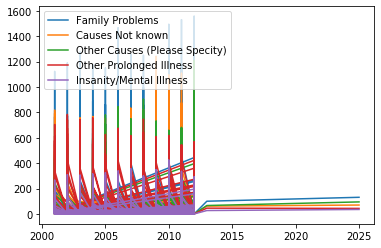

In [24]:
#Plot for Linear Regression
for i in range(0,len(Final)):
    x1=Final[i]["Year"]
    y1=Final[i]["Total"]
    name=Final[i]["Type"][0]
    plt.plot(x1, y1, label =name)
    plt.legend(loc="upper left")

In [158]:
print(len(Final))

5


0.0
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
[32909]
      Year             Type    Total
0   2001.0  Family Problems  24162.0
1   2002.0  Family Problems  25085.0
2   2003.0  Family Problems  26308.0
3   2004.0  Family Problems  25531.0
4   2005.0  Family Problems  25441.0
5   2006.0  Family Problems  30771.0
6   2007.0  Family Problems  29238.0
7   2008.0  Family Problems  29777.0
8   2009.0  Family Problems  30082.0
9   2010.0  Family Problems  31856.0
10  2011.0  Family Problems  32909.0
11  2012.0  Family Problems  30792.0
12  2013.0              NaN  32909.0
13  2014.0              NaN  32909.0
14  2015.0              NaN  32909.0
15  2016.0              NaN  32909.0
16  2017.0              NaN  32909.0
17  2018.0              NaN  32909.0
18  2019.0              NaN  32909.0
19  2020.0              NaN  32909.0
20  2021.0              NaN  32909.0
21  2022.0              NaN  32909.0
22  2023.0              NaN  32909.0
23  

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


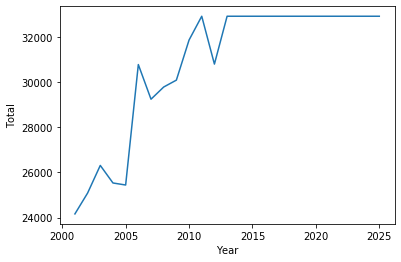

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
      Year              Type    Total
0   2001.0  Causes Not known  20585.0
1   2002.0  Causes Not known  19706.0
2   2003.0  Causes Not known  17631.0
3   2004.0  Causes Not known  18812.0
4   2005.0  Causes Not known  17445.0
5   2006.0  Causes Not known  17159.0
6   2007.0  Causes Not known  20409.0
7   2008.0  Causes Not known  20124.0
8   2009.0  Causes Not known  21313.0
9   2010.0  Causes Not known  22685.0
10  2011.0  Causes Not known  23024.0
11  2012.0  Causes Not known  18176.0
12  2013.0               NaN  18176.0
13  2014.0               NaN  18176.0
14  2015.0               NaN  18176.0
15  2016.0               NaN  18176.0
16  2017.0               NaN  18176.0
17  2018.0               NaN  18176.0
18  2019.0               NaN  18176.0
19  2020.0               NaN  18176.0
20  2021.0               NaN  18176.0
21  2022.0               NaN  18176.0
22  2023.0        

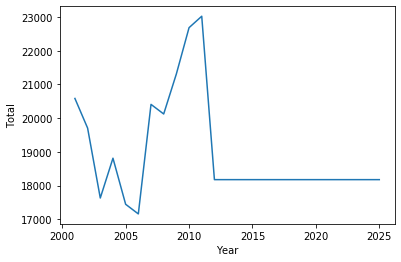

0.0
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
      Year                           Type    Total
0   2001.0  Other Causes (Please Specity)  13854.0
1   2002.0  Other Causes (Please Specity)  14820.0
2   2003.0  Other Causes (Please Specity)  14801.0
3   2004.0  Other Causes (Please Specity)  16195.0
4   2005.0  Other Causes (Please Specity)  19447.0
5   2006.0  Other Causes (Please Specity)  15278.0
6   2007.0  Other Causes (Please Specity)  17653.0
7   2008.0  Other Causes (Please Specity)  18668.0
8   2009.0  Other Causes (Please Specity)  20474.0
9   2010.0  Other Causes (Please Specity)  21438.0
10  2011.0  Other Causes (Please Specity)  22634.0
11  2012.0  Other Causes (Please Specity)  20788.0
12  2013.0                            NaN  20788.0
13  2014.0                            NaN  20788.0
14  2015.0                            NaN  20788.0
15  2016.0                            NaN  20788.0
16  2017.0               

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


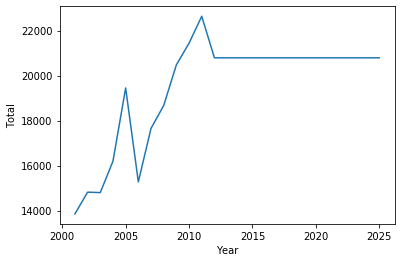

0.0
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
      Year                     Type    Total
0   2001.0  Other Prolonged Illness  15947.0
1   2002.0  Other Prolonged Illness  17296.0
2   2003.0  Other Prolonged Illness  15636.0
3   2004.0  Other Prolonged Illness  16341.0
4   2005.0  Other Prolonged Illness  14820.0
5   2006.0  Other Prolonged Illness  16497.0
6   2007.0  Other Prolonged Illness  16452.0
7   2008.0  Other Prolonged Illness  16651.0
8   2009.0  Other Prolonged Illness  16028.0
9   2010.0  Other Prolonged Illness  17044.0
10  2011.0  Other Prolonged Illness  16154.0
11  2012.0  Other Prolonged Illness  15699.0
12  2013.0                      NaN  15699.0
13  2014.0                      NaN  15699.0
14  2015.0                      NaN  15699.0
15  2016.0                      NaN  15699.0
16  2017.0                      NaN  15699.0
17  2018.0                      NaN  15699.0
18  2019.0                      NaN  

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


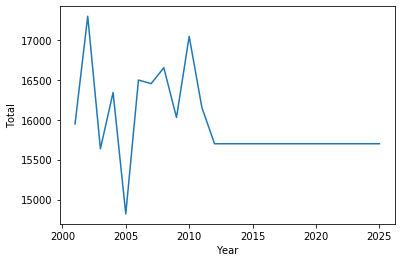

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
      Year                     Type   Total
0   2001.0  Insanity/Mental Illness  5858.0
1   2002.0  Insanity/Mental Illness  6440.0
2   2003.0  Insanity/Mental Illness  7323.0
3   2004.0  Insanity/Mental Illness  7117.0
4   2005.0  Insanity/Mental Illness  7604.0
5   2006.0  Insanity/Mental Illness  8045.0
6   2007.0  Insanity/Mental Illness  8638.0
7   2008.0  Insanity/Mental Illness  8699.0
8   2009.0  Insanity/Mental Illness  8469.0
9   2010.0  Insanity/Mental Illness  9465.0
10  2011.0  Insanity/Mental Illness  8802.0
11  2012.0  Insanity/Mental Illness  7769.0
12  2013.0                      NaN  8802.0
13  2014.0                      NaN  8802.0
14  2015.0                      NaN  8802.0
15  2016.0                      NaN  8802.0
16  2017.0                      NaN  8802.0
17  2018.0                      NaN  8802.0
18  2019.0                      NaN  8802.0
19  2020.0               

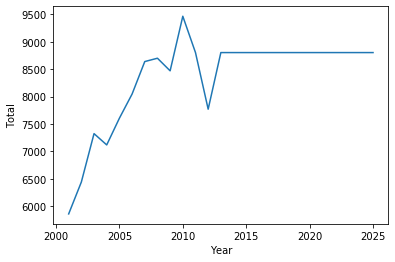

,Year,Type,Total
10,2001,Family Problems,24162
36,2002,Family Problems,25085
62,2003,Family Problems,26308
88,2004,Family Problems,25531
114,2005,Family Problems,25441
140,2006,Family Problems,30771
166,2007,Family Problems,29238
192,2008,Family Problems,29777
218,2009,Family Problems,30082
244,2010,Family Problems,31856


In [191]:
#Logistic Regression-ERRORS
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 


Final=[]
for DF in dfnames:
    sc_x = StandardScaler() 

    X = np.array(DF["Year"]).reshape(-1, 1) 
    Y = np.array(DF["Total"]).reshape(-1, 1)
    #print(DF['Type'][-1:1])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
    #X_train = sc_x.fit_transform(X_train)  
    #X_test = sc_x.transform(X_test)
    #y_train = sc_x.fit_transform(y_train)  
    #y_test = sc_x.transform(y_test)
    regr = LogisticRegression(random_state = 0)

    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))
    
    for i in range(2013,2026):
        y_pred = regr.predict(np.array(i).reshape(-1, 1))
        print(y_pred)
        #plt.scatter(X_test, y_test, color ='b') 
        #plt.plot(X_test, y_pred, color ='k') 
        #print(y_pred)
        temp={'Year':i,'Total':y_pred[0]}
        DF=DF.append(temp,ignore_index=True)
    Final.append(DF)
    print(DF)
    # draw lineplot 
    sns.lineplot(x="Year", y="Total", data=DF) 
    plt.show()
df1   

C:\Users\Maheysh V\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6392756008835394
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
[30491.07]
      Year             Type     Total
0   2001.0  Family Problems  24162.00
1   2002.0  Family Problems  25085.00
2   2003.0  Family Problems  26308.00
3   2004.0  Family Problems  25531.00
4   2005.0  Family Problems  25441.00
5   2006.0  Family Problems  30771.00
6   2007.0  Family Problems  29238.00
7   2008.0  Family Problems  29777.00
8   2009.0  Family Problems  30082.00
9   2010.0  Family Problems  31856.00
10  2011.0  Family Problems  32909.00
11  2012.0  Family Problems  30792.00
12  2013.0              NaN  30491.07
13  2014.0              NaN  30491.07
14  2015.0              NaN  30491.07
15  2016.0              NaN  30491.07
16  2017.0              NaN  30491.07
17  2018.0              NaN  30491.07
18  2019.0              NaN  30491.07
19  2020.0              NaN  30491.07
20  2021.0              NaN  30491.07
21

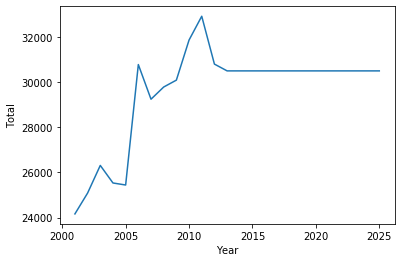

C:\Users\Maheysh V\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


-93.50197013383756
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
[19901.8]
      Year              Type    Total
0   2001.0  Causes Not known  20585.0
1   2002.0  Causes Not known  19706.0
2   2003.0  Causes Not known  17631.0
3   2004.0  Causes Not known  18812.0
4   2005.0  Causes Not known  17445.0
5   2006.0  Causes Not known  17159.0
6   2007.0  Causes Not known  20409.0
7   2008.0  Causes Not known  20124.0
8   2009.0  Causes Not known  21313.0
9   2010.0  Causes Not known  22685.0
10  2011.0  Causes Not known  23024.0
11  2012.0  Causes Not known  18176.0
12  2013.0               NaN  19901.8
13  2014.0               NaN  19901.8
14  2015.0               NaN  19901.8
15  2016.0               NaN  19901.8
16  2017.0               NaN  19901.8
17  2018.0               NaN  19901.8
18  2019.0               NaN  19901.8
19  2020.0               NaN  19901.8
20  2021.0               NaN  19901.8
21  2022.0     

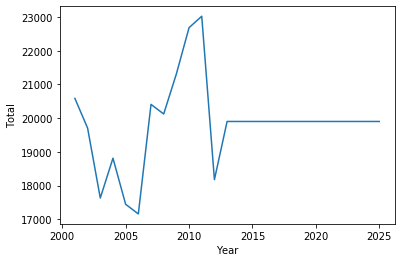

C:\Users\Maheysh V\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.18505796162407206
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
[20490.74]
      Year                           Type     Total
0   2001.0  Other Causes (Please Specity)  13854.00
1   2002.0  Other Causes (Please Specity)  14820.00
2   2003.0  Other Causes (Please Specity)  14801.00
3   2004.0  Other Causes (Please Specity)  16195.00
4   2005.0  Other Causes (Please Specity)  19447.00
5   2006.0  Other Causes (Please Specity)  15278.00
6   2007.0  Other Causes (Please Specity)  17653.00
7   2008.0  Other Causes (Please Specity)  18668.00
8   2009.0  Other Causes (Please Specity)  20474.00
9   2010.0  Other Causes (Please Specity)  21438.00
10  2011.0  Other Causes (Please Specity)  22634.00
11  2012.0  Other Causes (Please Specity)  20788.00
12  2013.0                            NaN  20490.74
13  2014.0                            NaN  20490.74
14  2015.0                            NaN  20490.74
15  2

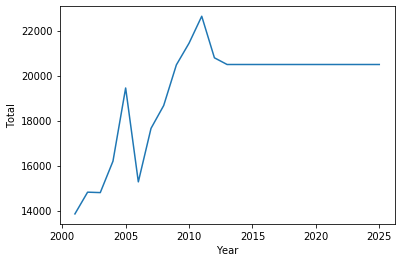

C:\Users\Maheysh V\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


-1.4138288276355517
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
[15858.68]
      Year                     Type     Total
0   2001.0  Other Prolonged Illness  15947.00
1   2002.0  Other Prolonged Illness  17296.00
2   2003.0  Other Prolonged Illness  15636.00
3   2004.0  Other Prolonged Illness  16341.00
4   2005.0  Other Prolonged Illness  14820.00
5   2006.0  Other Prolonged Illness  16497.00
6   2007.0  Other Prolonged Illness  16452.00
7   2008.0  Other Prolonged Illness  16651.00
8   2009.0  Other Prolonged Illness  16028.00
9   2010.0  Other Prolonged Illness  17044.00
10  2011.0  Other Prolonged Illness  16154.00
11  2012.0  Other Prolonged Illness  15699.00
12  2013.0                      NaN  15858.68
13  2014.0                      NaN  15858.68
14  2015.0                      NaN  15858.68
15  2016.0                      NaN  15858.68
16  2017.0                      NaN  15858.68
17  2018.

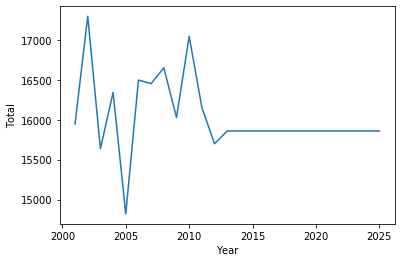

C:\Users\Maheysh V\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7726388557848112
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
[8199.86]
      Year                     Type    Total
0   2001.0  Insanity/Mental Illness  5858.00
1   2002.0  Insanity/Mental Illness  6440.00
2   2003.0  Insanity/Mental Illness  7323.00
3   2004.0  Insanity/Mental Illness  7117.00
4   2005.0  Insanity/Mental Illness  7604.00
5   2006.0  Insanity/Mental Illness  8045.00
6   2007.0  Insanity/Mental Illness  8638.00
7   2008.0  Insanity/Mental Illness  8699.00
8   2009.0  Insanity/Mental Illness  8469.00
9   2010.0  Insanity/Mental Illness  9465.00
10  2011.0  Insanity/Mental Illness  8802.00
11  2012.0  Insanity/Mental Illness  7769.00
12  2013.0                      NaN  8199.86
13  2014.0                      NaN  8199.86
14  2015.0                      NaN  8199.86
15  2016.0                      NaN  8199.86
16  2017.0                      NaN  8199.86
17  2018.0                      NaN  8199

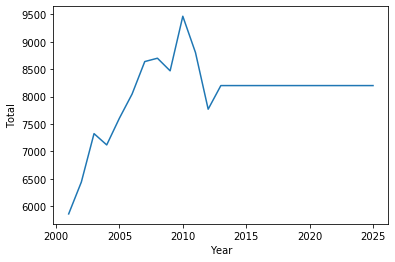

,Year,Type,Total
10,2001,Family Problems,24162
36,2002,Family Problems,25085
62,2003,Family Problems,26308
88,2004,Family Problems,25531
114,2005,Family Problems,25441
140,2006,Family Problems,30771
166,2007,Family Problems,29238
192,2008,Family Problems,29777
218,2009,Family Problems,30082
244,2010,Family Problems,31856


In [219]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

Final=[]
for DF in dfnames:
    sc_x = StandardScaler() 

    X = np.array(DF["Year"]).reshape(-1, 1) 
    Y = np.array(DF["Total"]).reshape(-1, 1)
    #print(DF['Type'][-1:1])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
    #X_train = sc_x.fit_transform(X_train)  
    #X_test = sc_x.transform(X_test)
    #y_train = sc_x.fit_transform(y_train)  
    #y_test = sc_x.transform(y_test)
    regr = RandomForestRegressor(n_estimators = 100, random_state = 0)

    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))

    
    for i in range(2013,2026):
        y_pred = regr.predict([[i]] )
        print(y_pred)
        #plt.scatter(X_test, y_test, color ='b') 
        #plt.plot(X_test, y_pred, color ='k') 
        #print(y_pred)
        temp={'Year':i,'Total':y_pred[0]}
        DF=DF.append(temp,ignore_index=True)
    Final.append(DF)
    print(DF)
    # draw lineplot 
    sns.lineplot(x="Year", y="Total", data=DF) 
    plt.show()
df1 

[6381.23]


0.5776611017176394
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
[-0.39055442]
      Year             Type         Total
0   2001.0  Family Problems  24162.000000
1   2002.0  Family Problems  25085.000000
2   2003.0  Family Problems  26308.000000
3   2004.0  Family Problems  25531.000000
4   2005.0  Family Problems  25441.000000
5   2006.0  Family Problems  30771.000000
6   2007.0  Family Problems  29238.000000
7   2008.0  Family Problems  29777.000000
8   2009.0  Family Problems  30082.000000
9   2010.0  Family Problems  31856.000000
10  2011.0  Family Problems  32909.000000
11  2012.0  Family Problems  30792.000000
12  2013.0              NaN     -0.390554
13  2014.0              NaN     -0.390554
14  2015.0              NaN     -0.390554
15  2016.0              NaN     -0.390554
16  2017.0              NaN     -0.390554
17  2018.0              NaN     -0.390554
1

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


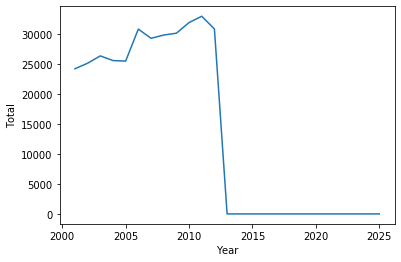

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5979075901711677
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
[-0.35754879]
      Year              Type         Total
0   2001.0  Causes Not known  20585.000000
1   2002.0  Causes Not known  19706.000000
2   2003.0  Causes Not known  17631.000000
3   2004.0  Causes Not known  18812.000000
4   2005.0  Causes Not known  17445.000000
5   2006.0  Causes Not known  17159.000000
6   2007.0  Causes Not known  20409.000000
7   2008.0  Causes Not known  20124.000000
8   2009.0  Causes Not known  21313.000000
9   2010.0  Causes Not known  22685.000000
10  2011.0  Causes Not known  23024.000000
11  2012.0  Causes Not known  18176.000000
12  2013.0               NaN     -0.357549
13  2014.0               NaN     -0.357549
14  2015.0               NaN     -0.357549
15  2016.0               NaN     -0.357549
16  2017.0               NaN     -0.357549
17  2018.0               

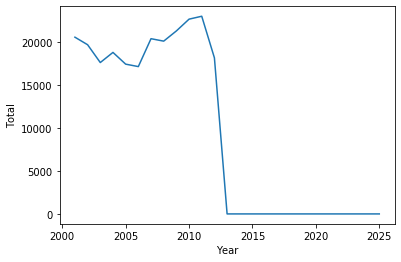

0.18463962082124408
[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[0.11189691]
[0.11189691]
[0.11189691]
[0.11189691]
      Year                           Type         Total
0   2001.0  Other Causes (Please Specity)  13854.000000
1   2002.0  Other Causes (Please Specity)  14820.000000
2   2003.0  Other Causes (Please Specity)  14801.000000
3   2004.0  Other Causes (Please Specity)  16195.000000
4   2005.0  Other Causes (Please Specity)  19447.000000
5   2006.0  Other Causes (Please Specity)  15278.000000
6   2007.0  Other Causes (Please Specity)  17653.000000
7   2008.0  Other Causes (Please Specity)  18668.000000
8   2009.0  Other Causes (Please Specity)  20474.000000
9   2010.0  Other Causes (Please Specity)  21438.000000
10  2011.0  Other Causes (Please Specity)  22634.000000
11  2012.0  Other Causes (Please Specity)  20788.000000
12  2013.0                            NaN      0.111897
13  2014.0                            NaN      0.111897
14  2015.0                            NaN      0.111897
15  2016.0                            NaN      0.11

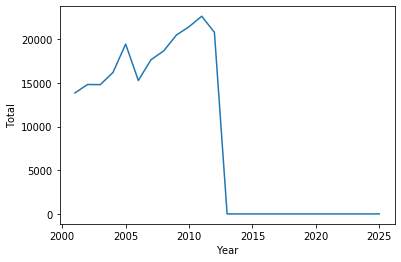

0.7654206189189801
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]
[-0.3564218]


C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-0.3564218]
[-0.3564218]
[-0.3564218]
      Year                     Type         Total
0   2001.0  Other Prolonged Illness  15947.000000
1   2002.0  Other Prolonged Illness  17296.000000
2   2003.0  Other Prolonged Illness  15636.000000
3   2004.0  Other Prolonged Illness  16341.000000
4   2005.0  Other Prolonged Illness  14820.000000
5   2006.0  Other Prolonged Illness  16497.000000
6   2007.0  Other Prolonged Illness  16452.000000
7   2008.0  Other Prolonged Illness  16651.000000
8   2009.0  Other Prolonged Illness  16028.000000
9   2010.0  Other Prolonged Illness  17044.000000
10  2011.0  Other Prolonged Illness  16154.000000
11  2012.0  Other Prolonged Illness  15699.000000
12  2013.0                      NaN     -0.356422
13  2014.0                      NaN     -0.356422
14  2015.0                      NaN     -0.356422
15  2016.0                      NaN     -0.356422
16  2017.0                      NaN     -0.356422
17  2018.0                      NaN     -0.356422
18  2019.0 

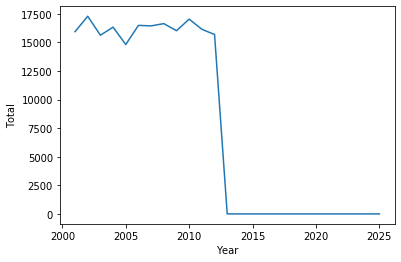

0.39028044295018194
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
[-0.32978887]
      Year                     Type        Total
0   2001.0  Insanity/Mental Illness  5858.000000
1   2002.0  Insanity/Mental Illness  6440.000000
2   2003.0  Insanity/Mental Illness  7323.000000
3   2004.0  Insanity/Mental Illness  7117.000000
4   2005.0  Insanity/Mental Illness  7604.000000
5   2006.0  Insanity/Mental Illness  8045.000000
6   2007.0  Insanity/Mental Illness  8638.000000
7   2008.0  Insanity/Mental Illness  8699.000000
8   2009.0  Insanity/Mental Illness  8469.000000
9   2010.0  Insanity/Mental Illness  9465.000000
10  2011.0  Insanity/Mental Illness  8802.000000
11  2012.0  Insanity/Mental Illness  7769.000000
12  2013.0                      NaN    -0.329789
13  2014.0                      NaN    -0.329789
14  2015.0                      NaN    -0.329789
15  2016.0    

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


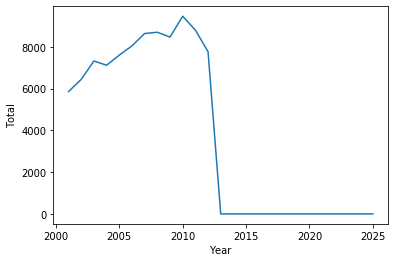

,Year,Type,Total
10,2001,Family Problems,24162
36,2002,Family Problems,25085
62,2003,Family Problems,26308
88,2004,Family Problems,25531
114,2005,Family Problems,25441
140,2006,Family Problems,30771
166,2007,Family Problems,29238
192,2008,Family Problems,29777
218,2009,Family Problems,30082
244,2010,Family Problems,31856


In [217]:
#SVR
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 


Final=[]
for DF in dfnames:
    scale_X = StandardScaler()
    scale_y = StandardScaler()

    X = scale_X.fit_transform(X.reshape(-1, 1))
    Y = scale_y.fit_transform(Y.reshape(-1, 1))

    #     X = np.array(DF["Year"]).reshape(-1, 1) 
    #     Y = np.array(DF["Total"]).reshape(-1, 1)
    #print(DF['Type'][-1:1])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
    #X_train = sc_x.fit_transform(X_train)  
    #X_test = sc_x.transform(X_test)
    #y_train = sc_x.fit_transform(y_train)  
    #y_test = sc_x.transform(y_test)
    regr = SVR(kernel='rbf', gamma='auto')

    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))
    
    for i in range(2013,2026):
        y_pred = regr.predict(np.array(i).reshape(-1, 1))
        print(y_pred)
        #plt.scatter(X_test, y_test, color ='b') 
        #plt.plot(X_test, y_pred, color ='k') 
        #print(y_pred)
        temp={'Year':i,'Total':y_pred[0]}
        DF=DF.append(temp,ignore_index=True)
    Final.append(DF)
    print(DF)
    # draw lineplot 
    sns.lineplot(x="Year", y="Total", data=DF) 
    plt.show()
df1 

-1.6971089302419686
EDFRGTH [25645.66020035]
EDFRGTH [25658.40022261]
EDFRGTH [25671.14024487]
EDFRGTH [25683.88026713]
EDFRGTH [25696.62028939]
EDFRGTH [25709.36031165]
EDFRGTH [25722.10033391]
EDFRGTH [25734.84035617]
EDFRGTH [25747.58037843]
EDFRGTH [25760.32040069]
EDFRGTH [25773.06042295]
EDFRGTH [25785.80044521]
EDFRGTH [25798.54046747]
      Year             Type         Total
0   2001.0  Family Problems  24162.000000
1   2002.0  Family Problems  25085.000000
2   2003.0  Family Problems  26308.000000
3   2004.0  Family Problems  25531.000000
4   2005.0  Family Problems  25441.000000
5   2006.0  Family Problems  30771.000000
6   2007.0  Family Problems  29238.000000
7   2008.0  Family Problems  29777.000000
8   2009.0  Family Problems  30082.000000
9   2010.0  Family Problems  31856.000000
10  2011.0  Family Problems  32909.000000
11  2012.0  Family Problems  30792.000000
12  2013.0              NaN  25645.660200
13  2014.0              NaN  25658.400223
14  2015.0              N

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


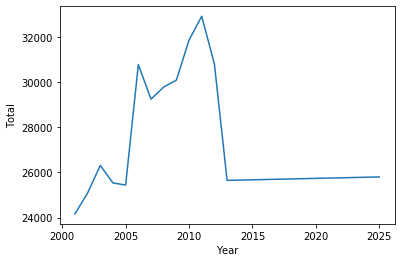

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-0.5056127722659871
EDFRGTH [19814.27470668]
EDFRGTH [19824.11786183]
EDFRGTH [19833.96101699]
EDFRGTH [19843.80417214]
EDFRGTH [19853.64732729]
EDFRGTH [19863.49048244]
EDFRGTH [19873.3336376]
EDFRGTH [19883.17679275]
EDFRGTH [19893.0199479]
EDFRGTH [19902.86310305]
EDFRGTH [19912.70625821]
EDFRGTH [19922.54941336]
EDFRGTH [19932.39256851]
      Year              Type         Total
0   2001.0  Causes Not known  20585.000000
1   2002.0  Causes Not known  19706.000000
2   2003.0  Causes Not known  17631.000000
3   2004.0  Causes Not known  18812.000000
4   2005.0  Causes Not known  17445.000000
5   2006.0  Causes Not known  17159.000000
6   2007.0  Causes Not known  20409.000000
7   2008.0  Causes Not known  20124.000000
8   2009.0  Causes Not known  21313.000000
9   2010.0  Causes Not known  22685.000000
10  2011.0  Causes Not known  23024.000000
11  2012.0  Causes Not known  18176.000000
12  2013.0               NaN  19814.274707
13  2014.0               NaN  19824.117862
14  2015.0  

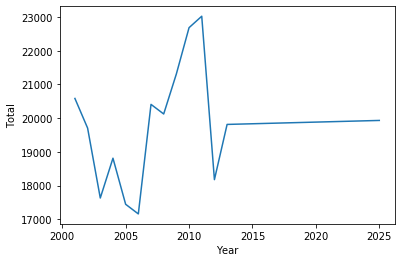

-0.5450137802857238
EDFRGTH [16267.73206594]
EDFRGTH [16275.8134066]
EDFRGTH [16283.89474727]
EDFRGTH [16291.97608793]
EDFRGTH [16300.05742859]
EDFRGTH [16308.13876925]
EDFRGTH [16316.22010991]
EDFRGTH [16324.30145057]
EDFRGTH

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 [16332.38279123]
EDFRGTH [16340.46413189]
EDFRGTH [16348.54547255]
EDFRGTH [16356.62681321]
EDFRGTH [16364.70815387]
      Year                           Type         Total
0   2001.0  Other Causes (Please Specity)  13854.000000
1   2002.0  Other Causes (Please Specity)  14820.000000
2   2003.0  Other Causes (Please Specity)  14801.000000
3   2004.0  Other Causes (Please Specity)  16195.000000
4   2005.0  Other Causes (Please Specity)  19447.000000
5   2006.0  Other Causes (Please Specity)  15278.000000
6   2007.0  Other Causes (Please Specity)  17653.000000
7   2008.0  Other Causes (Please Specity)  18668.000000
8   2009.0  Other Causes (Please Specity)  20474.000000
9   2010.0  Other Causes (Please Specity)  21438.000000
10  2011.0  Other Causes (Please Specity)  22634.000000
11  2012.0  Other Causes (Please Specity)  20788.000000
12  2013.0                            NaN  16267.732066
13  2014.0                            NaN  16275.813407
14  2015.0                            NaN 

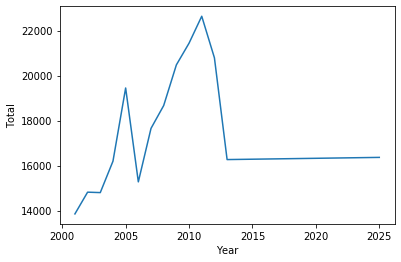

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.3726331961899092
EDFRGTH [16059.91238682]
EDFRGTH [16067.89048352]
EDFRGTH [16075.86858023]
EDFRGTH [16083.84667693]
EDFRGTH [16091.82477364]
EDFRGTH [16099.80287034]
EDFRGTH [16107.78096705]
EDFRGTH [16115.75906375]
EDFRGTH [16123.73716046]
EDFRGTH [16131.71525716]
EDFRGTH [16139.69335387]
EDFRGTH [16147.67145057]
EDFRGTH [16155.64954728]
      Year                     Type         Total
0   2001.0  Other Prolonged Illness  15947.000000
1   2002.0  Other Prolonged Illness  17296.000000
2   2003.0  Other Prolonged Illness  15636.000000
3   2004.0  Other Prolonged Illness  16341.000000
4   2005.0  Other Prolonged Illness  14820.000000
5   2006.0  Other Prolonged Illness  16497.000000
6   2007.0  Other Prolonged Illness  16452.000000
7   2008.0  Other Prolonged Illness  16651.000000
8   2009.0  Other Prolonged Illness  16028.000000
9   2010.0  Other Prolonged Illness  17044.000000
10  2011.0  Other Prolonged Illness  16154.000000
11  2012.0  Other Prolonged Illness  15699.000000
12  2

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


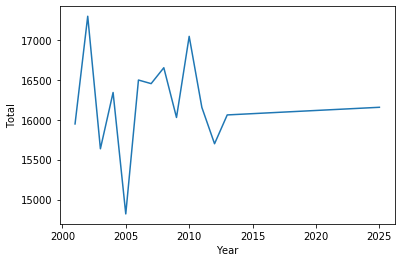

C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Maheysh V\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-0.009548286816095652
EDFRGTH [8663.82361961]
EDFRGTH [8668.12755621]
EDFRGTH [8672.43149281]
EDFRGTH [8676.73542942]
EDFRGTH [8681.03936602]
EDFRGTH [8685.34330262]
EDFRGTH [8689.64723922]
EDFRGTH [8693.95117582]
EDFRGTH [8698.25511243]
EDFRGTH [8702.55904903]
EDFRGTH [8706.86298563]
EDFRGTH [8711.16692223]
EDFRGTH [8715.47085883]
      Year                     Type        Total
0   2001.0  Insanity/Mental Illness  5858.000000
1   2002.0  Insanity/Mental Illness  6440.000000
2   2003.0  Insanity/Mental Illness  7323.000000
3   2004.0  Insanity/Mental Illness  7117.000000
4   2005.0  Insanity/Mental Illness  7604.000000
5   2006.0  Insanity/Mental Illness  8045.000000
6   2007.0  Insanity/Mental Illness  8638.000000
7   2008.0  Insanity/Mental Illness  8699.000000
8   2009.0  Insanity/Mental Illness  8469.000000
9   2010.0  Insanity/Mental Illness  9465.000000
10  2011.0  Insanity/Mental Illness  8802.000000
11  2012.0  Insanity/Mental Illness  7769.000000
12  2013.0                   

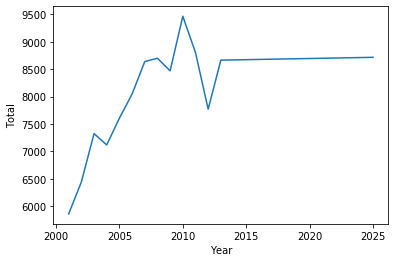

,Year,Type,Total
10,2001,Family Problems,24162
36,2002,Family Problems,25085
62,2003,Family Problems,26308
88,2004,Family Problems,25531
114,2005,Family Problems,25441
140,2006,Family Problems,30771
166,2007,Family Problems,29238
192,2008,Family Problems,29777
218,2009,Family Problems,30082
244,2010,Family Problems,31856


In [239]:
from sklearn.svm import LinearSVR
#LSVR
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 


Final=[]
for DF in dfnames:
#     scale_X = StandardScaler()
#     scale_y = StandardScaler()

#     X = scale_X.fit_transform(X.reshape(-1, 1))
#     Y = scale_y.fit_transform(Y.reshape(-1, 1))

    X = np.array(DF["Year"]).reshape(-1, 1) 
    Y = np.array(DF["Total"]).reshape(-1, 1)
    #print(DF['Type'][-1:1])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
    #X_train = sc_x.fit_transform(X_train)  
    #X_test = sc_x.transform(X_test)
    #y_train = sc_x.fit_transform(y_train)  
    #y_test = sc_x.transform(y_test)
#     regr = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive',
#                      fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0,
#                      random_state=None, max_iter=1000)
    regr = LinearSVR()

    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))
    
    for i in range(2013,2026):
        y_pred = regr.predict([[i]])
        print("EDFRGTH",y_pred)
        #plt.scatter(X_test, y_test, color ='b') 
        #plt.plot(X_test, y_pred, color ='k') 
        #print(y_pred)
        temp={'Year':i,'Total':y_pred[0]}
        DF=DF.append(temp,ignore_index=True)
    Final.append(DF)
    print(DF)
    # draw lineplot 
    sns.lineplot(x="Year", y="Total", data=DF) 
    plt.show()
df1 